## Is it possible to use machine learning to predict an individual's income level based on demographic and employment information?

# Introduction

Understanding and predicting an individual's income level is essential for policymakers, researchers, and various industries. It is valuable in multiple domains that are related to business, such as advertising and hiring (Matz et el., 2019). In marketing, details about an individual's financial circumstances can be utilized to aim at consumers with appropriate products or services. In recruiting, knowledge of an individual's present income can serve as a reference point to assist companies in negotiating. Apart from that, accurate income level predictions can inform targeted interventions, enabling more effective resource allocation and support for those who need it most, to help resolve income inequality issue. The emergence of machine learning as a powerful predictive tool has opened up new possibilities for addressing data-driven problems like income prediction. This research aims to investigate the potential of machine learning in predicting an individual's income level based on demographic and employment information.

## Literature review

Traditionally, classical statistical methods, such as linear regression and logistic regression, can be used in income prediction. For example, Yarnold(2019) used linear regression and novometric models respectively to model the relationship between education income, with both models displaying strong effects. Recent studies have demonstrated various more advanced machine learning methods and information that can be used in income prediction. Even modelling based on the digital footprints people leave on Facebook is a viable means of income prediction(Matz et el., 2019). In this study, they found that income is predictable using Facebook likes and Status Updates with machine learning techniques. A similar research buildt a model for income prediction by using users' temporal orientation of Tweets (Hasanuzzaman et al., 2017). These studies all show the possibility of using machine learning models to predict an individual's income with their information.

## Research question

The research question of this paper is "Is it possible to use machine learning to predict an individual's income level based on demographic and employment information?". 

## Presentation of data

Firstly, we import packages needed for data visualization and analysis.

In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot') 
%matplotlib inline

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In this research, an income dataset from Kohavi and Ron (1996) is used.This dataset includes 15 variables, including age, work class, fnlwgt, education, edu_num, marital status, occupation, relationship, race, sex, capital gain, capital loss, working hours per week, native country, and income. Income is selected as the dependent variable to analyze the impact of other variables on it. The following is the specific explanation of each variable:

Income: anual income, classified as >50K and <=50K.

age: age of each individual, continuous variable.

workclass: classifications of each individual's work, including: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: it is a weight assigned by the Census Bureau, representing the number of people the census believes share the same attributes, continuous variable.

education: classifications of education of each individual, including: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: the number of years of education, continuous variable.

marital-status: classified as: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: classified as: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: classified as: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: classified as: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous variable.

capital-loss: continuous variable.

hours-per-week: working hours per week, continuous variable.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Read the dataset remotely from the [github repository](https://github.com/zhuoranliu22/CASA0006), this repository stores both the dataset and the code:

In [3]:
data_org = pd.read_csv('https://raw.githubusercontent.com/zhuoranliu22/CASA0006/main/adult.csv',header = None)
data_org.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The dataset does not contain headers, so we manually add these:

In [4]:
data_org.columns = ['age','workclass','fnlwgt','education','edu_num','marital','occupation','relationship','race','sex','capital_gain',
                'capital_loss','hours_per_week','country','income']
data_org.head()


,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Using .info() function to check data types and non-null counts:

In [5]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu_num         32561 non-null  int64 
 5   marital         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Using .isnull().sum() function to check for empty columns, the result shows there are none:

In [6]:
data_org.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
edu_num           0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

Checking if there are any unusual values in the dataset:

In [7]:
data_org.value_counts()

age  workclass          fnlwgt  education      edu_num  marital              occupation          relationship    race    sex      capital_gain  capital_loss  hours_per_week  country         income
25    Private           195994   1st-4th       2         Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K    3
23    Private           240137   5th-6th       3         Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K    2
38    Private           207202   HS-grad       9         Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K     2
30    Private           144593   HS-grad       9         Never-married        Other-service       Not-in-family   Black   Male    0             0             40               ?               <=50K 

There are values as '?' in the dataset, so we replace them with na values and use .dropna() to drop them:

In [8]:
data_org.replace(' ?', np.nan,inplace=True)
data_org.dropna(inplace=True)
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   edu_num         30162 non-null  int64 
 5   marital         30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data treats Taiwan as an independent country by mistake, so we replace them:

In [9]:
data_org['country'] = data_org['country'].str.replace('Taiwan','China')

Using .duplicated().value_counts() to check if there are any duplicated values:

In [10]:
data_org.duplicated().value_counts()
#so there are duplicated values

False    30139
True        23
dtype: int64

Deleting the duplicated values:

In [11]:
data_org = data_org[~data_org.duplicated()]

In [12]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   edu_num         30139 non-null  int64 
 5   marital         30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital_gain    30139 non-null  int64 
 11  capital_loss    30139 non-null  int64 
 12  hours_per_week  30139 non-null  int64 
 13  country         30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Using label encoder to transfer object variables into numeric values for later analysis:

In [13]:
data = data_org.copy()
le = LabelEncoder()
cols = ['workclass','education','marital','occupation','relationship','race','sex','country','income']
for col in cols:
    data[col] = le.fit_transform(data[col].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   edu_num         30139 non-null  int64
 5   marital         30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital_gain    30139 non-null  int64
 11  capital_loss    30139 non-null  int64
 12  hours_per_week  30139 non-null  int64
 13  country         30139 non-null  int64
 14  income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


The followings are the visualizations of the object variables, so that we know roughly the proportion of each class within the variable data:

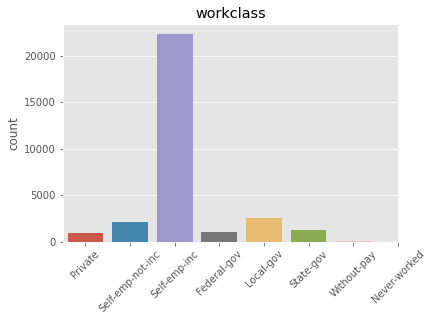

In [14]:
sns.countplot(data=data, x='workclass') # plot the union variable
plt.title('workclass')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],rotation=45)
plt.show() 

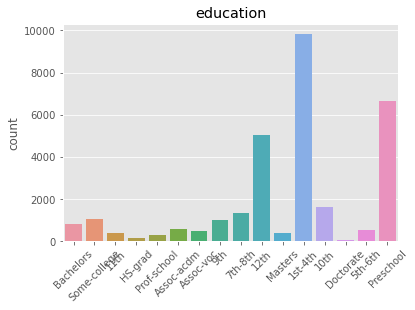

In [15]:
sns.countplot(data=data, x='education') # plot the union variable
plt.title('education')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],labels=['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm',
                                           'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 
                                           'Preschool'],rotation=45)
plt.show() 

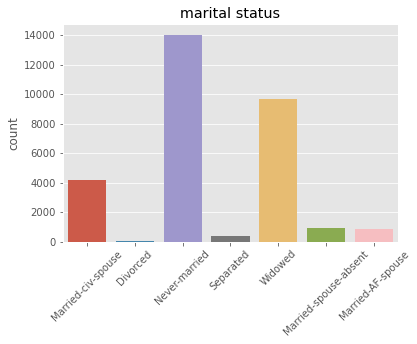

In [16]:
sns.countplot(data=data, x='marital') # plot the union variable
plt.title('marital status')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 
                                           'Married-spouse-absent', 'Married-AF-spouse'],rotation=45)
plt.show() 

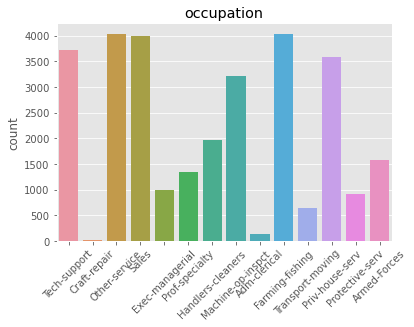

In [17]:
sns.countplot(data=data, x='occupation') # plot the union variable
plt.title('occupation')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 
                                         'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 
                                         'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 
                                         'Armed-Forces'],rotation=45)
plt.show() 

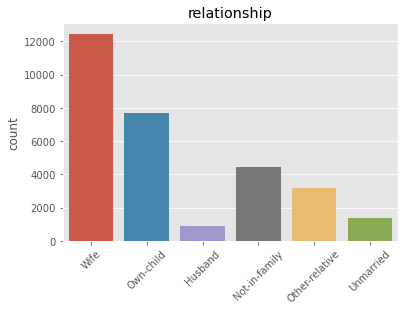

In [18]:
sns.countplot(data=data, x='relationship') # plot the union variable
plt.title('relationship')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5],labels=['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 
                                         'Unmarried'],rotation=45)
plt.show() 

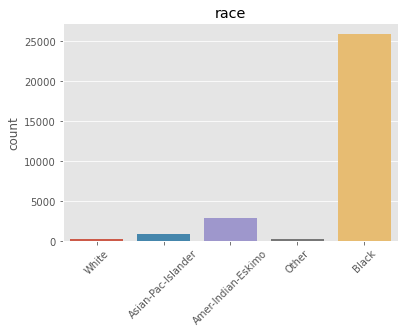

In [19]:
sns.countplot(data=data, x='race') # plot the union variable
plt.title('race')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4],labels=['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],rotation=45)
plt.show() 

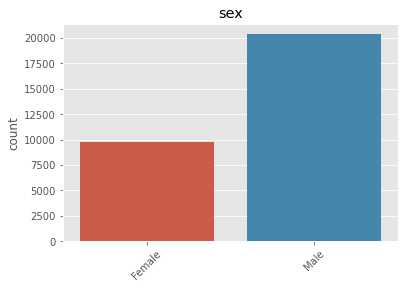

In [20]:
sns.countplot(data=data, x='sex') # plot the union variable
plt.title('sex')
plt.xlabel('') 
plt.xticks(ticks=[0,1],labels=['Female','Male'],rotation=45)
plt.show() 

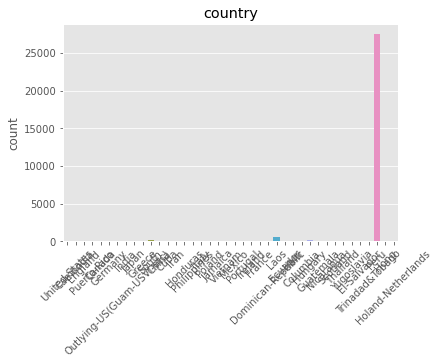

In [21]:
sns.countplot(data=data, x='country') # plot the union variable
plt.title('country')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                  34,35,36,37,38,39],labels=['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 
                                         'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 
                                         'Cuba','Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 
                                         'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 
                                         'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 
                                         'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'],rotation=45)
plt.show() 

The plot above is especially caotic, which gives very little information, so we directly print the values to get a clearer understanding:

In [22]:
print(data_org['country'].value_counts())

 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 China                           110
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 France                           27
 

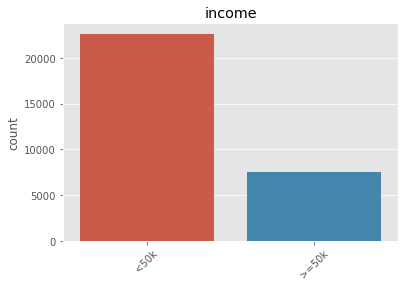

In [23]:
sns.countplot(data=data, x='income') # plot the union variable
plt.title('income')
plt.xlabel('') 
plt.xticks(ticks=[0,1],labels=['<50k', '>=50k'],rotation=45)
plt.show() 

After dealing with the object variables, we standardize the continuous variables to transfer them into the same scale to make it more comparable:

In [24]:
numeric_cols = ['age', 'fnlwgt', 'edu_num', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()
for col in numeric_cols:
    data[col] = scaler.fit_transform(data[[col]].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30139 non-null  float64
 1   workclass       30139 non-null  int64  
 2   fnlwgt          30139 non-null  float64
 3   education       30139 non-null  int64  
 4   edu_num         30139 non-null  float64
 5   marital         30139 non-null  int64  
 6   occupation      30139 non-null  int64  
 7   relationship    30139 non-null  int64  
 8   race            30139 non-null  int64  
 9   sex             30139 non-null  int64  
 10  capital_gain    30139 non-null  float64
 11  capital_loss    30139 non-null  float64
 12  hours_per_week  30139 non-null  float64
 13  country         30139 non-null  int64  
 14  income          30139 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.7 MB


In [25]:
data.head()

,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,0.0425,5,-1.0627,9,1.1290,4,0,1,4,1,0.1459,-0.2187,-0.0780,37,0
1,0.8802,4,-1.0078,9,1.1290,2,3,0,4,1,-0.1475,-0.2187,-2.3321,37,0
2,-0.0336,2,0.2447,11,-0.4404,0,5,1,4,1,-0.1475,-0.2187,-0.0780,37,0
3,1.1087,2,0.4252,1,-1.2251,2,5,0,2,1,-0.1475,-0.2187,-0.0780,37,0
4,-0.7952,2,1.4066,9,1.1290,2,9,5,2,0,-0.1475,-0.2187,-0.0780,4,0


Using the .describe() function of look at the summary statistics of each variable:

In [26]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
age,"30,139.0000",0.0000,1.0000,-1.6300,-0.8000,-0.1100,0.6500,3.9300
workclass,"30,139.0000",2.2000,0.9500,0.0000,2.0000,2.0000,2.0000,6.0000
fnlwgt,"30,139.0000",-0.0000,1.0000,-1.6700,-0.6800,-0.1100,0.4500,12.2600
education,"30,139.0000",10.3300,3.8100,0.0000,9.0000,11.0000,12.0000,15.0000
edu_num,"30,139.0000",0.0000,1.0000,-3.5800,-0.4400,-0.0500,1.1300,2.3100
marital,"30,139.0000",2.5800,1.5000,0.0000,2.0000,2.0000,4.0000,6.0000
occupation,"30,139.0000",5.9600,4.0300,0.0000,2.0000,6.0000,9.0000,13.0000
relationship,"30,139.0000",1.4200,1.6000,0.0000,0.0000,1.0000,3.0000,5.0000
race,"30,139.0000",3.6800,0.8300,0.0000,4.0000,4.0000,4.0000,4.0000
sex,"30,139.0000",0.6800,0.4700,0.0000,0.0000,1.0000,1.0000,1.0000


# Methodology

Since there are multiple independent variables and one dependent variable, the regression method is firstly considered to observe their relationship. The dependent variable Income is binary, classified as <50k and >=50k, so logistic regression is more suitble within this context. Logistic regression is a type of generalized linear model that uses the logistic function to model the relationship between a binary dependent variable and one or more independent variables. Therefore, it is the ideal statistical method for this research. However, compared to other more advanced machine learning methods, it has some limitations:
1. Logistic regression presumes a linear relationship between the log odds of the outcome variable and the predictor variables. However, this assumption might not be valid for this research, in which case non-linear relationships among variables is of greater chance.
2. Logistic regression may have difficulty in capturing the complexity of interactions among variables, at least not as well as more advanced models like decision trees, random forests, and deep learning models. 
3. Logistic regression is sensitive to outliers, potentially resulting in overfitting and inacurate predictions.

Therefore, decision tree and random forest will be used as well to more accurately build the model and to observe which of these factors have greater impact on income level. In building decision tree classifier, the hyperparameters including maximum depth and minimum sample split will be tuned by using ```GridSearchCV``` to find the optimal combination. After building the models, the accuracy of the models will be listed for comparison.

## Logistic Regression

Setting a variable X to be the independent variable set by excluding income from the data:

In [27]:
X = data.drop(['income'], axis = 1)
income = data['income']

Building a logistic regression and then fit it:

In [28]:
logreg = LogisticRegression()
logreg.fit(X, income)
y_pred=logreg.predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Print the coefficients of each independent variable and accuracy of the model, then draw the confusion matrix:

age : 0.45332219632585313
workclass : -0.12053612508622287
fnlwgt : 0.051192007562625444
education : 0.01781336379548908
edu_num : 0.8258198000313188
marital : -0.21967304014294953
occupation : -0.001326286597562123
relationship : -0.13356852742708936
race : 0.09903988747116774
sex : 0.821153025595385
capital_gain : 2.4088145018561278
capital_loss : 0.2777374287544041
hours_per_week : 0.3548057223036181
country : -0.004522077963938876
------------------------------------------
Accuracy of the model is: 0.8192707123660373
The confusion matrix is:


<AxesSubplot:>

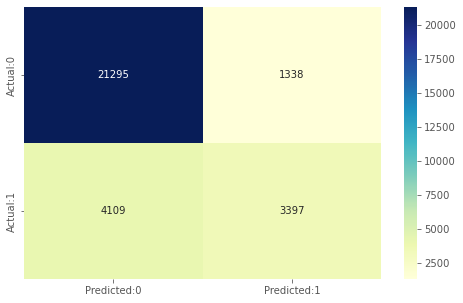

In [29]:
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(income,y_pred)
print("Accuracy of the model is: " + str(acc))

print("The confusion matrix is:")
cm=confusion_matrix(income,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Decision Tree

Creating a dictionary array to store the dataset:

In [30]:
X_dict = X.to_dict('records')
print(X_dict[0])

{'age': 0.042515506897587416, 'workclass': 5, 'fnlwgt': -1.0626760419550594, 'education': 9, 'edu_num': 1.128995981400911, 'marital': 4, 'occupation': 0, 'relationship': 1, 'race': 4, 'sex': 1, 'capital_gain': 0.14592530644158153, 'capital_loss': -0.21867335078526204, 'hours_per_week': -0.0780313310622559, 'country': 37}


Exlude the variable names and create X_matrix, then convert it into an array:

In [31]:
vec = DictVectorizer()
X_matrix = vec.fit_transform(X_dict)

In [32]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['age', 'capital_gain', 'capital_loss', 'country', 'edu_num']
{'age': 0, 'workclass': 13, 'fnlwgt': 6, 'education': 5, 'edu_num': 4, 'marital': 8, 'occupation': 9, 'relationship': 11, 'race': 10, 'sex': 12, 'capital_gain': 1, 'capital_loss': 2, 'hours_per_week': 7, 'country': 3}


In [33]:
X_array = X_matrix.toarray()
print(X_array.shape)
print(type(X_array))

(30139, 14)
<class 'numpy.ndarray'>


Divide the dataset into training data and testing data based on the default ratio, which is 75:25 division:

In [34]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_array,income, random_state=random_state_split)

In [35]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(22604, 14)
(22604,)
(7535, 14)
(7535,)


Firstly, create a default decision tree classfier:

In [36]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)

The score on the training dataset is:

In [37]:
score_train = clf.score(train_x, train_y)
score_train

1.0

The score on the testing dataset is:

In [38]:
score_test = clf.score(test_x, test_y)
score_test

0.8114134041141341

The tree depth with default settings is:

In [39]:
clf.get_depth()

48

Tune the hyperparameters:

In [40]:
hyperparameters = {'max_depth':[30,50,70,90,110], 'min_samples_split':[10,12,14,16,18]}

randomState_dt = 10000
dt = DecisionTreeClassifier(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf_1 = GridSearchCV(dt, hyperparameters)

clf_1.fit(train_x, train_y)

# query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf_1.best_params_)
print ("The best score is: ")
print (clf_1.best_score_)

The best parameter value is: 
{'max_depth': 30, 'min_samples_split': 16}
The best score is: 
0.8242789695286306


Build models with the 8 values of the max_depth and store the test scores in variable test:

In [41]:
test = []
for i in range(30,110,10):
    clf_test = DecisionTreeClassifier(random_state=10000 ,max_depth=i,min_samples_split=16)
    clf_test = clf_test.fit(train_x,train_y)
    score = clf_test.score(test_x,test_y)
    test.append(score)

Visualize the test scores of these models:

[0.8272063702720637, 0.8264100862641008, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738]


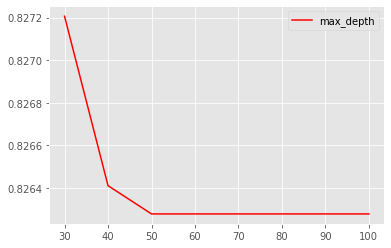

In [42]:
print(test)
plt.plot(test,color='red',label ='max_depth')
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels = ['30','40','50','60','70','80','90','100'])
plt.legend()
plt.show()

Train the final model with the tuned parameters:

In [43]:
decision_tree =DecisionTreeClassifier(max_depth=clf_1.best_params_['max_depth'], min_samples_split=clf_1.best_params_['min_samples_split'], random_state=randomState_dt)
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=30, min_samples_split=16, random_state=10000)

In [44]:
print("Score on the training data:")
print(decision_tree.score(train_x, train_y))
print("Score on the testing data:")
print(decision_tree.score(test_x, test_y))

Score on the training data:
0.9210759157671209
Score on the testing data:
0.8272063702720637


For demonstration, the structure of this tree is output by setting the maximum depth to be 3:

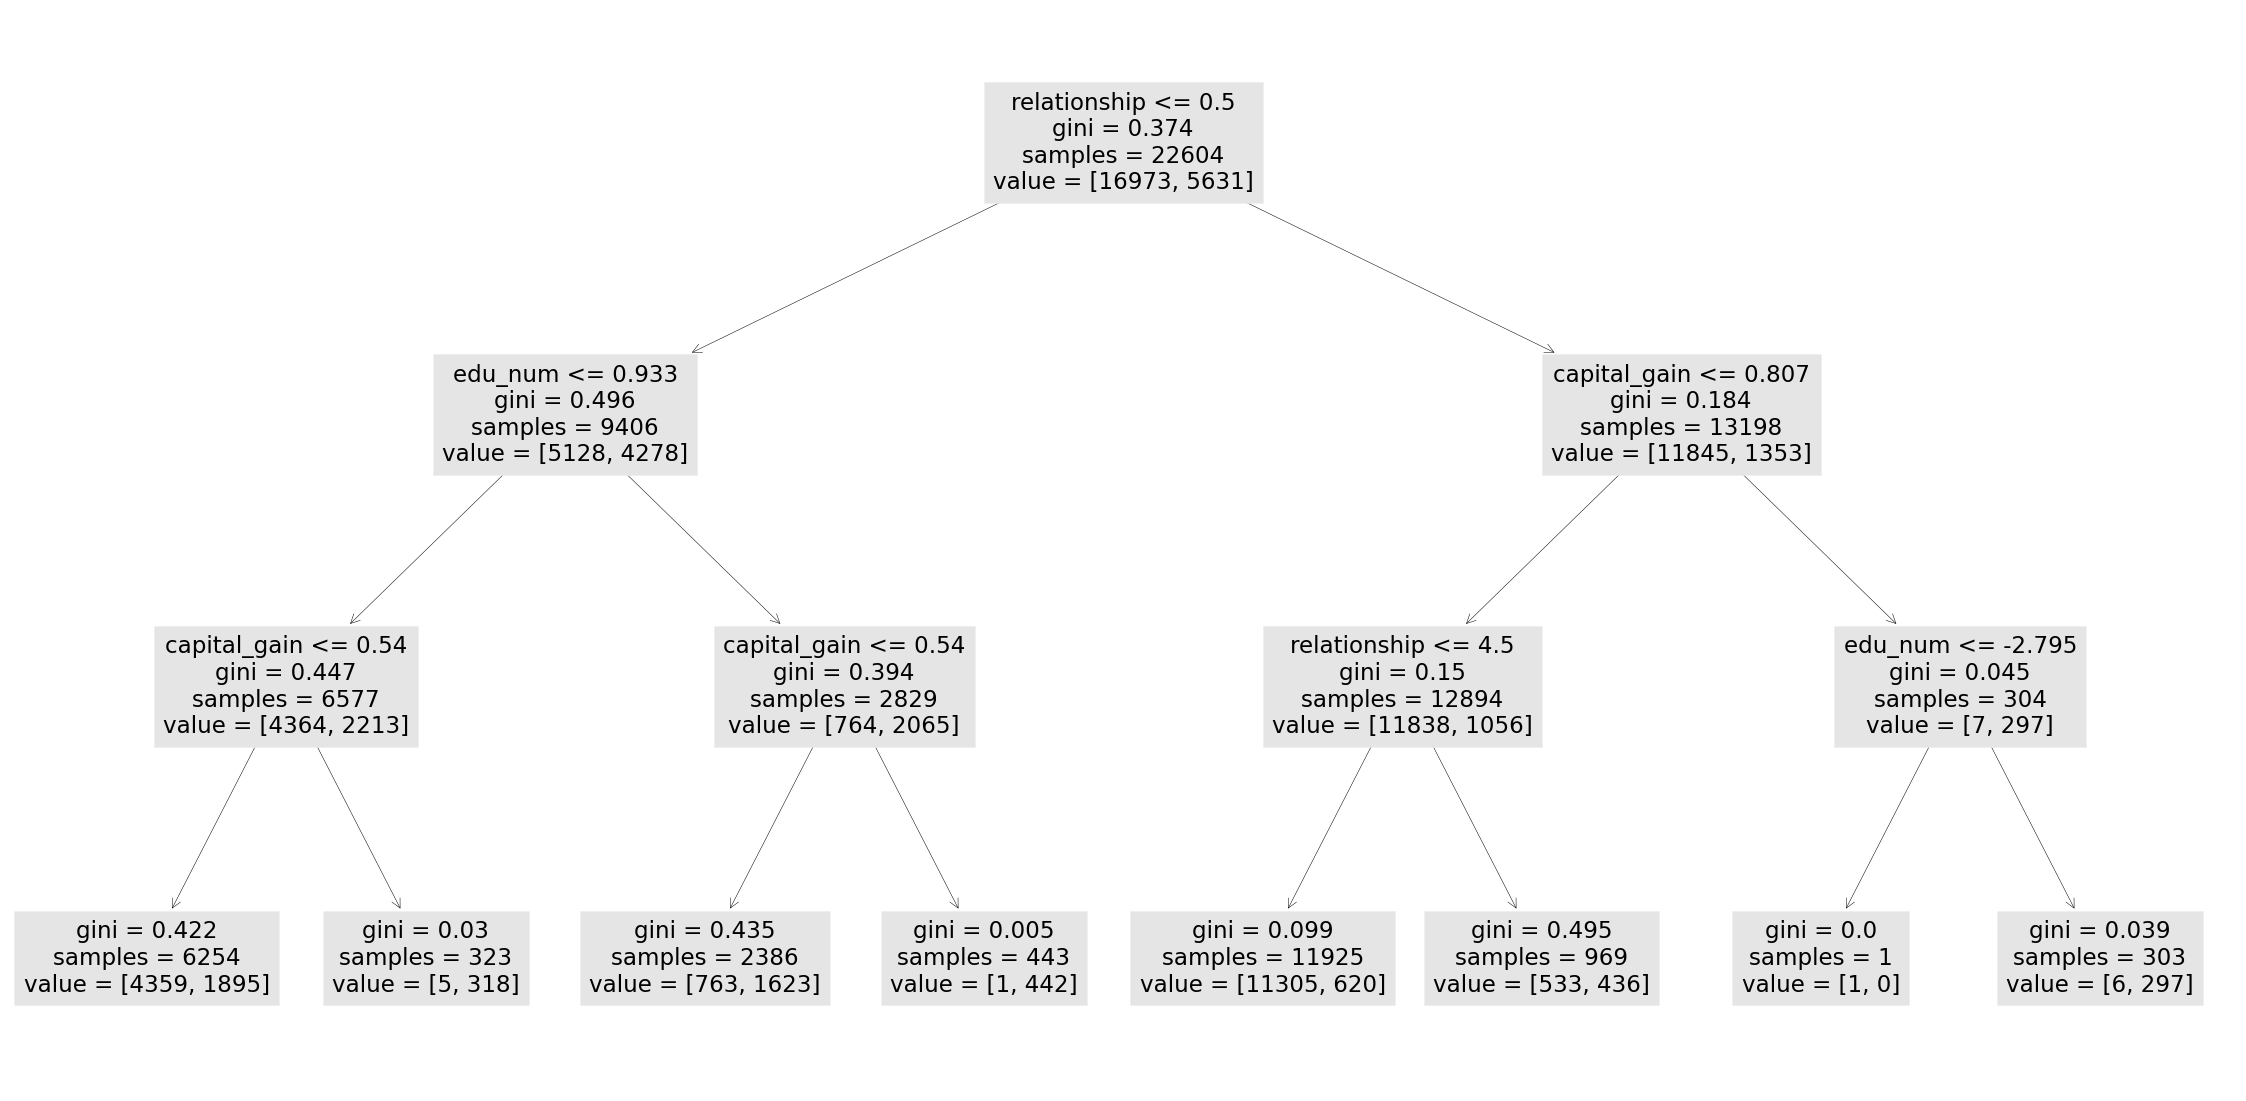

In [45]:
decision_tree_plot = DecisionTreeClassifier(max_depth=3)
decision_tree_plot.fit(train_x, train_y)
plt.figure(figsize=(40,20))

_ = tree.plot_tree(decision_tree_plot, feature_names = vec.feature_names_)
plt.show()

The plot shows the feature importance:

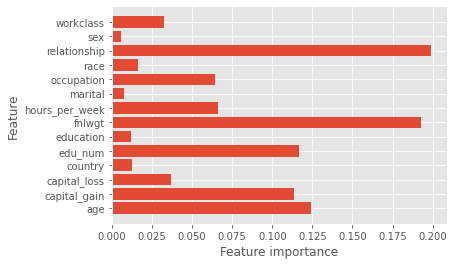

In [46]:
plt.barh(range(X.shape[1]), clf.feature_importances_, align='center')
    
plt.yticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13), vec.feature_names_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## Random Forest

Building the random forest model by using the default hyperparameters, as tuning them is too time-consuming in this case:

In [47]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)    
forest.fit(train_x, train_y) 
print('Accuracy on training set: {:.3f}'.format(forest.score(train_x, train_y)))
print('Accuracy on test set: {:.3f}'.format(forest.score(test_x,test_y)))       

Accuracy on training set: 1.000
Accuracy on test set: 0.854


The score on the testing data is lower than that on the training data, suggesting overfitting problem. 

Here is the feature importance of this model:

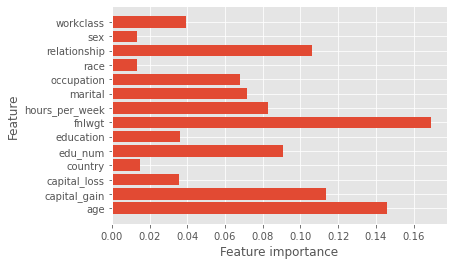

In [48]:
plt.barh(range(X.shape[1]), forest.feature_importances_, align='center')
    
plt.yticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13), vec.feature_names_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Results and discussion

In logistic regression, the confusion matrix shows that 21295 smaples are correctly predicted as type 0, which is <50k, and 3397 samples are correctly predicted as type 1, which is >=50k. From this result, it suggests the model acuracy is higher when the actual outcome is 0, but much lower when the actual outcome is 1, in which case the number of mistakenly predicted samples is even greater than the correct ones. Therefore, it is essential to build more advanced machine learning models to get a more precise classification. 

The accuracy of the logistic regression model is 0.8192, and the score on the training data and testing data of decesion tree model and random forest model is listed in the following table. By comparison, the score of random forest model is higher than the other models, but the difference in R<sup>2</sup> between training data and testing data of decision tree model is lower. It suggests that decision tree model has a better chance in mitigating overfitting problem.

In [49]:
# create a list of models
list_name_models = ['Decision Tree', 'Random Forest']
# use the models from above
list_reg_models = [decision_tree, forest]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models

,R2_train_data,R2_test_data,R2_diff
Decision Tree,0.9211,0.8272,0.0939
Random Forest,1.0000,0.8543,0.1457


Regarding the feature importance, the top three important variables in logisitic regression model are capital_gain, edu_num and sex. In decision tree model, the top three are relationship, fnlweight and age. In random forest model, these are fnlweight, age and capital_gain. These results show they have a greater impact on income, especially age.

The overall result is that the decision tree model and random forest model perform better than logistic regression, with relationship, fnlweight, capital gain and age to be the most influential factors on income.

There are several limitations of this research:
1. Outliers were not handled. Logistic regression is sensitive to outliers, so removing them may improve the performance;
2. Even though the decision tree model has the smallest difference in R<sup>2</sup>, it still has overfitting problem;
3. The hyperparameters of the random forest model were not tuned as in the decision tree model. Tuning the hyperparameters may improve the performance score of this model.

# Conclusion

After conducting the whole research process, the research question can be answered: it is possible to use machine learning to predict one's income level using their demographic and employment information. Three machine learning models are used: logistic regression, decision tree classifier, and random forest classifier, with score up to 0.85. Among the attributes, age, capital gain, fnlweight, relationship, number of years of education, and sex have greater impact on one's income. Therefore, government or companies who need to have a general understanding of people's income level can pay more attention to these attributes, and use machine learning models to make predictions after gaining ethical approval.

In [50]:
end_time = time.time()
run_time = end_time - start_time
print("Total running time: ", run_time, "seconds")

Total running time:  106.84555101394653 seconds


word count: 1691

# References

Hasanuzzaman M, Kamila S, Kaur M, Saha S, and Ekbal A (2017). Temporal Orientation of Tweets for Predicting Income of Users. In Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics, 2,659–665.

Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5S595.

Matz SC, Menges JI, Stillwell DJ, Schwartz HA (2019) Predicting individual-level income from Facebook profiles. PLoS ONE 14(3): e0214369. https://doi.org/10.1371/journal.pone.0214369

Yarnold, P. R. (2019). Regression vs. novometric analysis predicting income based on education. Optimal Data Analysis, 8, 81-83.